In [44]:
import pickle

with open ('../result/final_cv.pkl', 'rb') as f:
    df=pickle.load(f)

In [45]:
df

,n_neighbors,weights,model,data,y,cv,mean_test_recall,std_test_recall,rank_test_recall,grouping,threshold,scaling,class_weight,max_features,n_estimators,warm_start,C,kernel
0,1.0,uniform,KNN,tr,y_agg,tss,0.542381,0.130663,8,original,0.2,_scaling,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,distance,KNN,tr,y_agg,tss,0.542381,0.130663,8,original,0.2,_scaling,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,uniform,KNN,tr,y_agg,tss,0.546136,0.077448,6,original,0.2,_scaling,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,distance,KNN,tr,y_agg,tss,0.542381,0.130663,8,original,0.2,_scaling,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,uniform,KNN,tr,y_agg,tss,0.551987,0.130734,4,original,0.2,_scaling,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,NaN,NaN,SVC,ntr,y_oecd,tss,0.489360,0.027861,11,km,0.5,,NaN,NaN,NaN,NaN,2.0,rbf
8,NaN,NaN,SVC,ntr,y_oecd,tss,0.608625,0.158118,1,km,0.5,,NaN,NaN,NaN,NaN,2.0,sigmoid
9,NaN,NaN,SVC,ntr,y_oecd,tss,0.544434,0.064920,5,km,0.5,,NaN,NaN,NaN,NaN,5.0,poly
10,NaN,NaN,SVC,ntr,y_oecd,tss,0.487267,0.021792,12,km,0.5,,NaN,NaN,NaN,NaN,5.0,rbf


In [46]:
# threshold sensitivity

df_threshold_sensitivity = df[(df['y'] == 'y_oecd') & (df['grouping'] == 'original') & (df['data'] == 'tr') \
                            & (df['n_estimators'] == 30) & (df['class_weight'] == 'balanced') \
                            & (df['warm_start'] == True) & (df['max_features'] == 0.3) & (df['scaling'] == '_scaling')]
df_threshold_sensitivity

,n_neighbors,weights,model,data,y,cv,mean_test_recall,std_test_recall,rank_test_recall,grouping,threshold,scaling,class_weight,max_features,n_estimators,warm_start,C,kernel
6,NaN,NaN,RF,tr,y_oecd,tss,0.660502,0.142958,59,original,0.2,_scaling,balanced,0.3,30.0,True,NaN,NaN
6,NaN,NaN,RF,tr,y_oecd,tss,0.746513,0.063187,1,original,0.3,_scaling,balanced,0.3,30.0,True,NaN,NaN
6,NaN,NaN,RF,tr,y_oecd,tss,0.736557,0.054876,59,original,0.4,_scaling,balanced,0.3,30.0,True,NaN,NaN
6,NaN,NaN,RF,tr,y_oecd,tss,0.749258,0.055796,59,original,0.5,_scaling,balanced,0.3,30.0,True,NaN,NaN


6    0.2
6    0.3
6    0.4
6    0.5
Name: threshold, dtype: float64
6    0.660502
6    0.746513
6    0.736557
6    0.749258
Name: mean_test_recall, dtype: float64


Text(0, 0.5, 'Mean Recall')

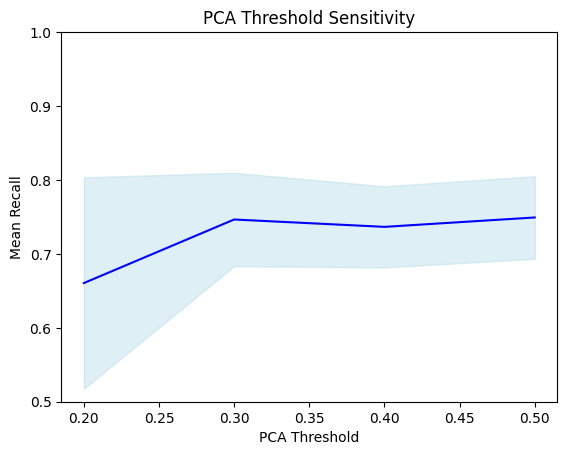

In [59]:
import matplotlib.pyplot as plt

x = df_threshold_sensitivity['threshold']
y = df_threshold_sensitivity['mean_test_recall']

print(x)
print(y)

ystd = df_threshold_sensitivity['std_test_recall']

plt.plot(x, y, '-', color='blue')

plt.fill_between(x, y - ystd, y + ystd, color='lightblue', alpha=0.4)
plt.ylim(0.5,1)

plt.title('PCA Threshold Sensitivity')
plt.xlabel('PCA Threshold')
plt.ylabel('Mean Recall')

In [48]:
# estimators sensitivity

df_estimators_sensitivity = df[(df['y'] == 'y_oecd') & (df['grouping'] == 'original') & (df['data'] == 'tr') \
                            & (df['threshold'] == 0.3) & (df['class_weight'] == 'balanced') \
                            & (df['warm_start'] == True) & (df['max_features'] == 0.3) & (df['scaling'] == '_scaling')]
df_estimators_sensitivity

,n_neighbors,weights,model,data,y,cv,mean_test_recall,std_test_recall,rank_test_recall,grouping,threshold,scaling,class_weight,max_features,n_estimators,warm_start,C,kernel
6,NaN,NaN,RF,tr,y_oecd,tss,0.746513,0.063187,1,original,0.3,_scaling,balanced,0.3,30.0,True,NaN,NaN
8,NaN,NaN,RF,tr,y_oecd,tss,0.737939,0.051581,7,original,0.3,_scaling,balanced,0.3,50.0,True,NaN,NaN
10,NaN,NaN,RF,tr,y_oecd,tss,0.734324,0.050205,9,original,0.3,_scaling,balanced,0.3,100.0,True,NaN,NaN


6      30.0
8      50.0
10    100.0
Name: n_estimators, dtype: float64
6     0.746513
8     0.737939
10    0.734324
Name: mean_test_recall, dtype: float64


Text(0, 0.5, 'Mean Recall')

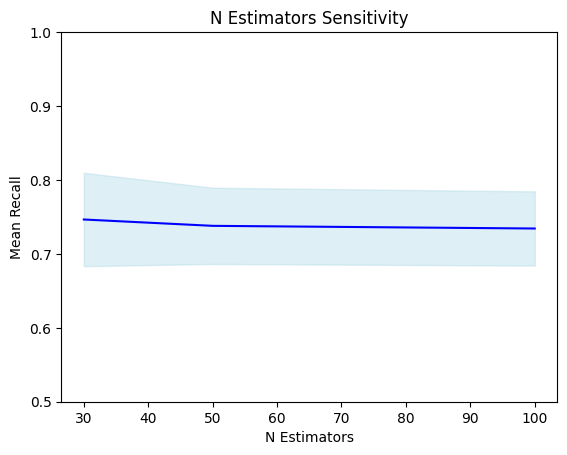

In [58]:
x = df_estimators_sensitivity['n_estimators']
y = df_estimators_sensitivity['mean_test_recall']

print(x)
print(y)

ystd = df_estimators_sensitivity['std_test_recall']

plt.plot(x, y, '-', color='blue')

plt.fill_between(x, y - ystd, y + ystd, color='lightblue', alpha=0.4)
plt.ylim(0.5,1)

plt.title('N Estimators Sensitivity')
plt.xlabel('N Estimators')
plt.ylabel('Mean Recall')

Text(0, 0.5, 'Mean Recall')

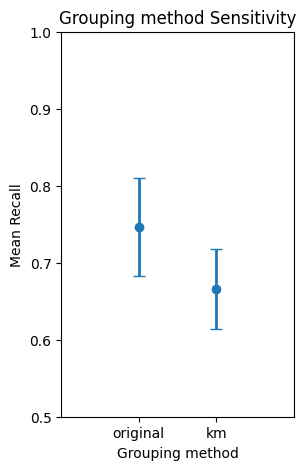

In [60]:
plt.figure(figsize=(3,5))

for threshold in [0.3]:  ##0.2,0.3,0.4,0.5
    df_sensitivity = df[(df['y'] == 'y_oecd')  \
    #& (df['grouping'] == 'original')  \
    & (df['data'] == 'tr') \
    & (df['n_estimators'] == 30)  \
    & (df['class_weight'] == 'balanced') \
    & (df['warm_start'] == True) \
    & (df['max_features'] == 0.3) \
    & (df['scaling'] == '_scaling') \
    & (df['threshold'] == threshold)
    ]

    x = df_sensitivity['grouping']
    y = df_sensitivity['mean_test_recall']

    ystd = df_sensitivity['std_test_recall']

    # plt.bar(x, y, color='gray')
    plt.errorbar(x, y, ystd, linestyle='None', marker='o', elinewidth=2, capsize=4)
    plt.margins(1, 1)

plt.ylim(0.5,1)
plt.title('Grouping method Sensitivity')
plt.xlabel('Grouping method')
plt.ylabel('Mean Recall')